# AAL Sales Data Analysis and Reports

### This notebook was compiled by <span style='color:Blue'> Neelkantho Bose  </span> as part of completing the course titled "Applied Data Science with Python".

## To perform the following tasks:
        1. Identify the states that are generating the highest revenues,
        2. Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.




## Import the Python Libraries required for analyzing the sales data

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from datetime import date, timedelta, datetime as dt

## Load the Sales Data from CSV into a Pandas DataFrame "Sales_df"

In [2]:
# Load the sales data into a pandas dataframe

sales_df=pd.read_csv('AusApparalSales4thQrt2020.csv')

In [3]:
print("Sales data successfully loaded into sales_df dataframe \n")
print(sales_df.head())


Sales data successfully loaded into sales_df dataframe 

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [4]:
print("Apply info() on the Sales DataFrame \n")
sales_df.info()

Apply info() on the Sales DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


### As seen from the Dataframe info() function there are no null values in any of the columns, rechecking with isna() function
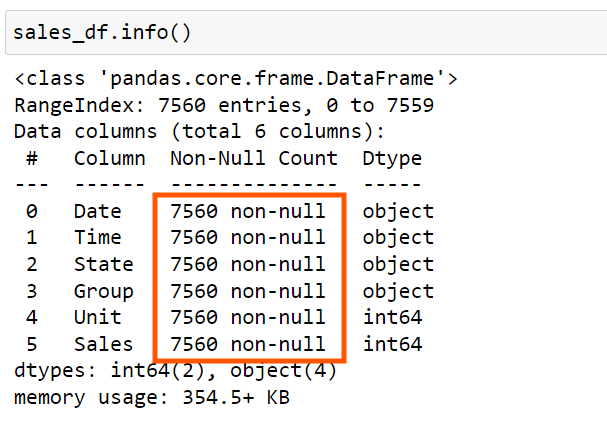

In [5]:
print("Revalidating null/empty values in DataFrame using isna()")
sales_df.isna().sum()

Revalidating null/empty values in DataFrame using isna()


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### Confirmed there are no null or missing values per the results of cell above.
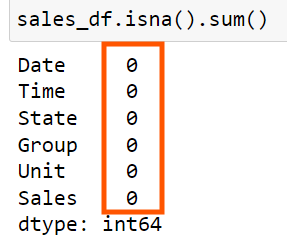

## Convert the Columns in the necessary format e.g. String (object) to Datetime or removing spaces from Categorical columns

In [6]:
# Convert the Date column to a datetime datatype

sales_df['Date']=pd.to_datetime(sales_df['Date'])

In [7]:
Categorical_columns=[c for c in sales_df.columns if sales_df[c].dtype in ['object']]
print(Categorical_columns)

['Time', 'State', 'Group']


In [8]:
# # Rough
# # Remove extra spaces in the values in Categorical columns
# sales_df.columns
# # ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']

# # Remove extra spaces in the values in Categorical columns

# sales_df['State']=sales_df['State'].apply(lambda x:x.strip())
# sales_df['Group']=sales_df['Group'].apply(lambda x:x.strip())
# # sales_df.State.unique()
# # strip(' WA')

In [9]:
# Remove extra spaces in the values in Categorical columns

sales_df['State']=sales_df['State'].apply(lambda x:x.strip())
sales_df['Group']=sales_df['Group'].apply(lambda x:x.strip())
sales_df['Time']=sales_df['Time'].apply(lambda x:x.strip())

In [10]:
#<Rough>
# Find the list of Numerical features
# type(sales_df.dtypes)
# for i in 
# sales_df.Date.dtype
[c for c in sales_df.columns if sales_df[c].dtype not in ['object','datetime64[ns]']]
# sales_df.columns
# sales_df.dtypes

['Unit', 'Sales']

In [11]:
# Find the list of Numerical features

numerical_columns=[c for c in sales_df.columns if sales_df[c].dtype not in ['object','datetime64[ns]']]

In [12]:
# <Rough>
# Descriptive analysis of Sales data

sales_df[numerical_columns].describe()


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


# Data Analysis
1. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
2. Identify the group with the highest sales and the group with the lowest sales based on the data provided.
3. Identify the State with the highest and lowest sales based on the data provided.
4. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

## 1. Descriptive Statistical Analysis of Sales Data using mean(), median(), std()


In [84]:
# Descriptive analysis of Sales data

print("***** Descriptive Statistics of the Sales Data ****** \n\n")

print("Mean Values of Unit and Sales data from the Dateset:\n",sales_df[numerical_columns].mean())
print("Median Values of Unit and Sales data from the Dateset:\n",sales_df[numerical_columns].median())
print("Standard Deviation of Unit and Sales data from the Dateset:\n",sales_df[numerical_columns].std())

***** Descriptive Statistics of the Sales Data ****** 


Mean Values of Unit and Sales data from the Dateset:
 Unit        18.005423
Sales    45013.558201
dtype: float64
Median Values of Unit and Sales data from the Dateset:
 Unit        14.0
Sales    35000.0
dtype: float64
Standard Deviation of Unit and Sales data from the Dateset:
 Unit        12.901403
Sales    32253.506944
dtype: float64


## 2. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [91]:
# Group with Max and Min of Total Sales

# Analyze the Sales Data by applying groupby on "Group" column
group_grps=sales_df.groupby(['Group'])

print("******  Groups with Max and Min of Total Sales ******* \n")
sales_grp_df=pd.DataFrame(group_grps.Sales.sum().reset_index().sort_values(by='Sales',ascending=False))

print("Group with Maximum sales:\n\n",sales_grp_df[sales_grp_df.Sales==sales_grp_df.Sales.max()],"\n")

print("Group with Minimum sales:\n\n",sales_grp_df[sales_grp_df.Sales==sales_grp_df.Sales.min()])




******  Groups with Max and Min of Total Sales ******* 

Group with Maximum sales:

   Group     Sales
1   Men  85750000 

Group with Minimum sales:

      Group     Sales
2  Seniors  84037500


## 3. Identify the State with the highest and lowest sales based on the data provided.

In [94]:
# Analyze the Sales Data by applying groupby on "Group" column
states_grps=sales_df.groupby(['State'])

print("******  States with Max and Min of Total Sales ******* \n")
sales_state_df=pd.DataFrame(states_grps.Sales.sum().reset_index().sort_values(by='Sales',ascending=False))

print("State with Maximum sales:\n\n",sales_state_df[sales_state_df.Sales==sales_state_df.Sales.max()],"\n")

print("State with Minimum sales:\n\n",sales_state_df[sales_state_df.Sales==sales_state_df.Sales.min()])


******  States with Max and Min of Total Sales ******* 

State with Maximum sales:

   State      Sales
5   VIC  105565000 

State with Minimum sales:

   State     Sales
6    WA  22152500


## 4. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [176]:
print("Create a copy of the original sales_df DataFrame: sales_freq_df \n")

sales_freq_df=sales_df.copy()

sales_freq_df

Create a copy of the original sales_df DataFrame: sales_freq_df 



,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [177]:
print(" Added the Week, Month and Quater Columns into this DataFrame \n")

sales_freq_df['Week']=sales_freq_df.Date.dt.week
sales_freq_df['Month']=sales_freq_df.Date.dt.month
sales_freq_df['Quarter']=sales_freq_df.Date.dt.quarter

sales_freq_df

 Added the Week, Month and Quater Columns into this DataFrame 



C:\Users\neelk\AppData\Local\Temp\ipykernel_32440\2741715273.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Date,Time,State,Group,Unit,Sales,Week,Month,Quarter
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,4
1,2020-10-01,Morning,WA,Men,8,20000,40,10,4
2,2020-10-01,Morning,WA,Women,4,10000,40,10,4
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,4
...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,53,12,4
7556,2020-12-30,Evening,TAS,Kids,15,37500,53,12,4
7557,2020-12-30,Evening,TAS,Men,15,37500,53,12,4
7558,2020-12-30,Evening,TAS,Women,11,27500,53,12,4


### Weekly Sales by State, group

In [180]:
print("Weekly Sales by State, group")

sales_freq_df.groupby(['State','Group','Week']).Sales.sum().reset_index()

Weekly Sales by State, group


,State,Group,Week,Sales
0,NSW,Kids,40,867500
1,NSW,Kids,41,1640000
2,NSW,Kids,42,1425000
3,NSW,Kids,43,1435000
4,NSW,Kids,44,1137500
...,...,...,...,...
387,WA,Women,49,475000
388,WA,Women,50,530000
389,WA,Women,51,522500
390,WA,Women,52,520000


### Monthly Sales by State, group

In [182]:
# Monthly Sales by State, group

print("Monthly Sales by State, group")
sales_freq_df.groupby(['State','Group','Month']).Sales.sum().reset_index().sort_values(by=['State','Group','Month','Sales'],ascending=[True, True, True,False])

Monthly Sales by State, group


,State,Group,Month,Sales
0,NSW,Kids,10,6340000
1,NSW,Kids,11,5312500
2,NSW,Kids,12,6935000
3,NSW,Men,10,6270000
4,NSW,Men,11,5490000
...,...,...,...,...
79,WA,Seniors,11,1295000
80,WA,Seniors,12,2230000
81,WA,Women,10,1792500
82,WA,Women,11,1220000


### Quarterly Sales by State, group

In [183]:
# Quarterly Sales by State, group

print("Quarterly Sales by State, group \n")
sales_freq_df.groupby(['State','Group','Quarter']).Sales.sum().reset_index().sort_values(by=['State','Group','Quarter','Sales'],ascending=[True, True, True,False])

Quarterly Sales by State, group 



,State,Group,Quarter,Sales
0,NSW,Kids,4,18587500
1,NSW,Men,4,19022500
2,NSW,Seniors,4,18187500
3,NSW,Women,4,19172500
4,NT,Kids,4,5700000
5,NT,Men,4,5762500
6,NT,Seniors,4,5465000
7,NT,Women,4,5652500
8,QLD,Kids,4,8510000
9,QLD,Men,4,8392500


### Overall Sales Analysis by State, Group

In [185]:
print("Overall Sales Analysis by State, Group")

sales_freq_df.groupby(['State','Group','Week','Month','Quarter']).Sales.sum().reset_index().sort_values(by=['State','Group','Week','Month','Quarter','Sales'],ascending=[True, True,True, True, True,False])

Overall Sales Analysis by State, Group


,State,Group,Week,Month,Quarter,Sales
0,NSW,Kids,40,10,4,867500
1,NSW,Kids,41,10,4,1640000
2,NSW,Kids,42,10,4,1425000
3,NSW,Kids,43,10,4,1435000
4,NSW,Kids,44,10,4,972500
...,...,...,...,...,...,...
443,WA,Women,49,12,4,437500
444,WA,Women,50,12,4,530000
445,WA,Women,51,12,4,522500
446,WA,Women,52,12,4,520000


### Create a Visualization DataFrame by applying groupby() on State and Group only

In [254]:
# Create groups on State and Group Columns by Applying groupby()

print(" Visualization Dataframe created from groups on State and Group Columns by Applying groupby(): vis_df \n")

sales_df.groupby(['State','Group'])[['Unit','Sales']].sum().reset_index()

vis_df=sales_df.groupby(['State','Group'])[['Unit','Sales']].sum().reset_index()

vis_df

 Visualization Dataframe created from groups on State and Group Columns by Applying groupby(): vis_df 



,State,Group,Unit,Sales
0,NSW,Kids,7435,18587500
1,NSW,Men,7609,19022500
2,NSW,Seniors,7275,18187500
3,NSW,Women,7669,19172500
4,NT,Kids,2280,5700000
5,NT,Men,2305,5762500
6,NT,Seniors,2186,5465000
7,NT,Women,2261,5652500
8,QLD,Kids,3404,8510000
9,QLD,Men,3357,8392500


### Create a Visualization Dataframe from the Overall Sales Data Analyzed

In [255]:
print(" Visualization Dataframe created from the Overall Sales Data Analyzed: vis_freq_df \n")

vis_freq_df=sales_freq_df.groupby(['State','Group','Week','Month','Quarter']).Sales.sum().reset_index().sort_values(by=['State','Group','Week','Month','Quarter','Sales'],ascending=[True, True,True, True, True,False])

vis_freq_df

 Visualization Dataframe created from the Overall Sales Data Analyzed: vis_freq_df 



,State,Group,Week,Month,Quarter,Sales
0,NSW,Kids,40,10,4,867500
1,NSW,Kids,41,10,4,1640000
2,NSW,Kids,42,10,4,1425000
3,NSW,Kids,43,10,4,1435000
4,NSW,Kids,44,10,4,972500
...,...,...,...,...,...,...
443,WA,Women,49,12,4,437500
444,WA,Women,50,12,4,530000
445,WA,Women,51,12,4,522500
446,WA,Women,52,12,4,520000


### Create a Visualization Dataframe from the Sales Data grouped by State, Group and Time for Time-of-the-day analysis 


In [260]:

print(" Visualization Dataframe created for Time-of-the-day analysis: vis_time_df \n")

sales_df.groupby(['State','Group','Time'])[['Unit','Sales']].sum().reset_index()

vis_time_df=sales_df.groupby(['State','Group','Time'])[['Unit','Sales']].sum().reset_index().sort_values(by=['Sales','Time'],ascending=[False,True])

vis_time_df

 Visualization Dataframe created for Time-of-the-day analysis: vis_time_df 



,State,Group,Time,Unit,Sales
68,VIC,Seniors,Morning,3623,9057500
62,VIC,Kids,Morning,3580,8950000
70,VIC,Women,Evening,3572,8930000
64,VIC,Men,Evening,3560,8900000
66,VIC,Seniors,Afternoon,3532,8830000
...,...,...,...,...,...
79,WA,Seniors,Evening,717,1792500
78,WA,Seniors,Afternoon,708,1770000
83,WA,Women,Morning,707,1767500
20,NT,Seniors,Morning,704,1760000


# Data visualization
    1. State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
    2. Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
    3. Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

In [256]:
# Rough
# Pyplot Bar chartof the Sales Data by State

# vis_df.plot(x="State",y="Sales",kind='hist',title="Sales by Sate")
# plt.show()

In [21]:
# Rough
# Using seaborn barplot to view Total Sales by State across Groups
# sns.barplot(x='State', y='Sales', data=vis_df, hue='Group')
# plt.title('Bar plot: Total Sales by State across Groups')
# plt.show()

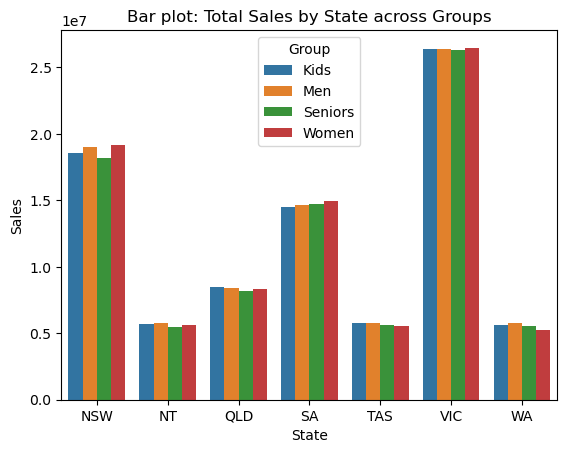

In [39]:
# Using seaborn barplot to view Total Sales by State across Groups
sns.barplot(x='State', y='Sales',data=vis_df, hue='Group')
plt.title('Bar plot: Total Sales by State across Groups')
plt.show()

In [23]:
#Rough

# import plotly.express as px

# fig1 = px.bar(vis_df, x="State", y="Sales", color="Group",title="Total Sales by State across Groups")
# fig2 = px.histogram(vis_df, x="State", y="Sales", color="Group",title="Total Sales by State across Groups")

# fig1.show()
# fig2.show()


## 1. State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

In [99]:
# Create a Histogram plot to view Total Sales by States across all groups

import plotly.express as px


fig = px.histogram(vis_df, x="State", y="Sales", color="Group",title="Total Sales by State across Groups")

fig.update_layout(xaxis_title="States",yaxis_title="Total Sales")

fig.show()


## 2. Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

In [101]:
# Create a Histogram plot to view Total Sales by Groups across all States

import plotly.express as px


fig = px.histogram(vis_df, x="Group", y="Sales", color="State",title="Total Sales by Group across States")

fig.update_layout(xaxis_title="Groups",yaxis_title="Total Sales")

fig.show()


## Appendix 
1. Weekly Report of Sales by State and Group
2. Monthly Report of Sales by State and Group

In [243]:
color_list=['State','Group']

for c in color_list:

    fig_weekly=px.bar(vis_freq_df, x='Week',y=['Sales'],color=c, title="Total Weekly Sales Report: By-"+c)

    fig_weekly.update_layout(xaxis_title="Week",yaxis_title="Total Sales")

    fig_weekly.show()
# vis_freq_df

In [244]:
color_list=['State','Group']

for c in color_list:

    fig_monthly=px.bar(vis_freq_df, x='Month',y=['Sales'],color=c, title="Total Monthly Sales Report: By-"+c)

    fig_monthly.update_layout(xaxis_title="Month",yaxis_title="Total Sales")

    fig_monthly.show()
# vis_freq_df

In [253]:
# Rough
# Create groups on State and Group Columns by Applying groupby()

# print(" Visualization Dataframe created from groups on State and Group Columns by Applying groupby(): vis_df \n")

sales_df.groupby(['State','Group','Time'])[['Unit','Sales']].sum().reset_index()

# vis_df=sales_df.groupby(['State','Group'])[['Unit','Sales']].sum().reset_index()

# vis_df

,State,Group,Time,Unit,Sales
0,NSW,Kids,Afternoon,2475,6187500
1,NSW,Kids,Evening,2453,6132500
2,NSW,Kids,Morning,2507,6267500
3,NSW,Men,Afternoon,2605,6512500
4,NSW,Men,Evening,2488,6220000
...,...,...,...,...,...
79,WA,Seniors,Evening,717,1792500
80,WA,Seniors,Morning,780,1950000
81,WA,Women,Afternoon,674,1685000
82,WA,Women,Evening,724,1810000


In [408]:
#Rough
# Total Sales by Time of the Day

print("Total Sales by the Time of the day \n")
vis_time_df.groupby('Time').Sales.sum().reset_index().sort_values(by='Sales',ascending=True)
print(vis_time_df.groupby('Time').Sales.sum().reset_index().sort_values(by='Sales',ascending=True),"\n\n")
print("Lowest Sales observed during:", \
      vis_time_df.groupby('Time').Sales.sum().reset_index().sort_values(by='Sales',ascending=True).reset_index().Time[0],\
      " across all states and groups")

Total Sales by the Time of the day 

        Time      Sales
1    Evening  112087500
0  Afternoon  114007500
2    Morning  114207500 


Lowest Sales observed during: Evening  across all states and groups


In [429]:
# Rough

print("Total Sales by Group \n")

# vis_time_df.groupby('Group').Sales.sum().reset_index()
print(vis_time_df.groupby('Group').Sales.sum().reset_index().sort_values(by='Sales',ascending=True),"\n")

# vis_time_df.groupby('Group').Sales.sum().reset_index().max()

# vis_time_df.groupby('Group').Sales.sum().reset_index().max().Group
print("Highest shopping category contributing to maximum sales across states and groups: ",\
     vis_time_df.groupby('Group').Sales.sum().reset_index().max().Group)

# print("Highest shopping category contributing to maximum sales across states and groups: ",\
#      vis_time_df.groupby('Group').Sales.sum().reset_index().max().Group)

Total Sales by Group 

     Group     Sales
2  Seniors  84037500
0     Kids  85072500
3    Women  85442500
1      Men  85750000 



In [420]:
# sales_df[sales_df.Group=="Women"].Sales.sum()

85442500

In [358]:
vis_time_df.groupby('Time').Sales.sum().reset_index()

,Time,Sales
0,Afternoon,114007500
1,Evening,112087500
2,Morning,114207500


In [337]:
# Rough

fig_time=px.bar(vis_time_df,x="Time",y="Sales",color="State",title="Time of the Day analysis")

fig_time.show()


In [343]:
# Rough
data=vis_time_df.groupby('Time').Sales.sum().reset_index().sort_values(by='Time',ascending=False)

fig_time=px.histogram(vis_time_df,x="Time",y="Sales",color='Group',title="Time of the Day analysis")

fig_time.show()

In [354]:
# Rough
data=vis_time_df.groupby('Time').Sales.sum().reset_index().sort_values(by='Time',ascending=False)

fig_time=px.box(vis_time_df,x="Time",y="Sales",color='Group',title="Time of the Day analysis")

fig_time.show()


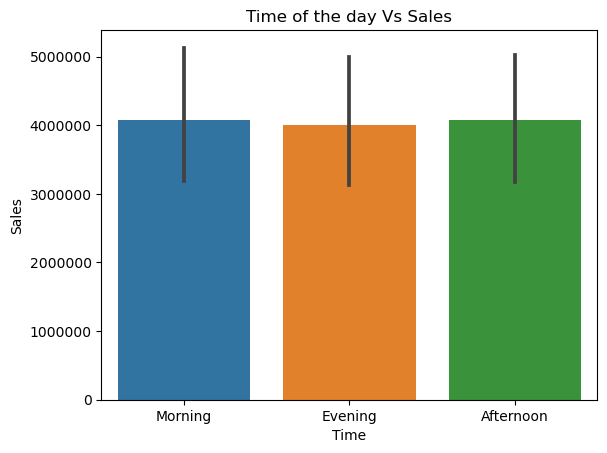

In [355]:
# Rough

# vis_time_df.dtypes

# # data=vis_time_df.groupby('Time').Sales.sum().reset_index().sort_values(by='Time',ascending=False)
# # data
ax=sns.barplot(vis_time_df,x="Time",y="Sales")
plt.title('Time of the day Vs Sales')
# plt.ylim(0, 10000000)
plt.ticklabel_format(style='plain', axis='y')


# print(zip(vis_time_df['Time'], vis_time_df['Sales']))

# for category, value in zip(vis_time_df['Time'], vis_time_df['Sales']):
#     plt.text(category,value,str(value), ha='center', va='bottom')
    
plt.show()

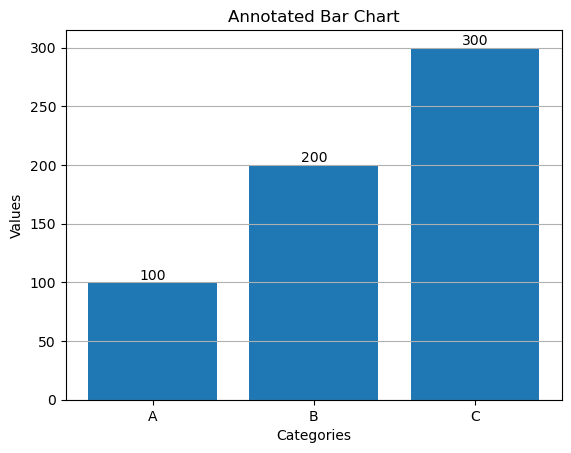

In [323]:
import matplotlib.pyplot as plt

# Sample data (replace with your own)
categories = ['A', 'B', 'C']
values = [100, 200, 300]

# Create a basic bar chart
plt.bar(categories, values)

# Add labels to each bar
for category, value in zip(categories, values):
    plt.text(category, value, str(value), ha='center', va='bottom')

# Customize plot labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Annotated Bar Chart')

# Show the plot
plt.grid(axis='y')
plt.show()
